# Notebook para Exploratory Data Analysis dos dados da plataforma Sucupira

In [1]:
import pandas as pd
import numpy as np
import pymysql as pms
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
tab = pd.read_csv('sucupirafilter.csv',sep=';')

In [3]:
tab.head()

,(area_avaliacao) id,(area_avaliacao) nome,(area_avaliacao) codigo,(area_conhecimento) id,(area_conhecimento) nome,(area_conhecimento) codigo,(area_conhecimento) area_avaliacao_id,(programa) id,(programa) nome,(programa) codigo,...,(instituicao) url,(instituicao) coordenadas,(curso) id,(curso) nome,(curso) situacao,(curso) nivel,(curso) nota_curso,(curso) data_recomendacao,(curso) data_inicio,(curso) programa_id
0,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,87,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,53045009001P3,...,http://portal.ufgd.edu.br/,-22.19446 -54.93025,125,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,EM FUNCIONAMENTO,Mestrado Profissional,3,23/04/2013,01/07/2014,87
1,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,88,ADMINISTRAÇÃO,32020015008P9,...,http://www.ppga.cefetmg.br,-19.9316 -43.98497,126,ADMINISTRAÇÃO,EM FUNCIONAMENTO,Mestrado,3,12/12/2014,03/08/2015,88
2,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,89,Administração,52016013002P3,...,http://www.unialfa.com.br/mestrado/adm,-16.64133 -49.30773,127,Administração,EM FUNCIONAMENTO,Mestrado Profissional,3,23/04/2012,01/08/2012,89
3,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,90,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,33149011003P8,...,http://www.faccamp.br/new/doutorado/administracao,-15.78791 -47.8782,128,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,EM FUNCIONAMENTO,Doutorado,4,26/10/2016,17/02/2017,90
4,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,91,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,33149011001P5,...,http://www.faccamp.br/new/doutorado/administracao,-15.78791 -47.8782,129,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,EM FUNCIONAMENTO,Mestrado Profissional,4,16/09/2008,01/01/2009,91


In [167]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 34 columns):
(area_avaliacao) id                      352 non-null int64
(area_avaliacao) nome                    352 non-null object
(area_avaliacao) codigo                  352 non-null int64
(area_conhecimento) id                   352 non-null int64
(area_conhecimento) nome                 352 non-null object
(area_conhecimento) codigo               352 non-null int64
(area_conhecimento) area_avaliacao_id    352 non-null int64
(programa) id                            352 non-null int64
(programa) nome                          352 non-null object
(programa) codigo                        352 non-null object
(programa) uf                            352 non-null object
(programa) area_conhecimento_id          352 non-null int64
(programa) instituicao_id                352 non-null int64
(instituicao) id                         352 non-null int64
(instituicao) nome                       352 non-n

In [6]:
tab['(curso) nota_curso'].value_counts()

4    121
3    115
5     74
A     17
6     14
7     10
2      1
Name: (curso) nota_curso, dtype: int64

__Temos notas 'A' inseridas dentro de notas no espectro de 2 a 7. Vamos investigar um pouco mais abaixo__

In [92]:
tab[tab['(curso) nota_curso'] == 'A']

,(area_avaliacao) id,(area_avaliacao) nome,(area_avaliacao) codigo,(area_conhecimento) id,(area_conhecimento) nome,(area_conhecimento) codigo,(area_conhecimento) area_avaliacao_id,(programa) id,(programa) nome,(programa) codigo,...,(instituicao) url,(instituicao) coordenadas,(curso) id,(curso) nome,(curso) situacao,(curso) nivel,(curso) nota_curso,(curso) data_recomendacao,(curso) data_inicio,(curso) programa_id
54,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,132,POLÍTICAS PÚBLICAS,33129010004P0,...,https://www.insper.edu.br/pos-graduacao/mestra...,-23.59862 -46.67658,179,POLÍTICAS PÚBLICAS,EM FUNCIONAMENTO,Mestrado Profissional,A,28/09/2018,08/04/2019,132
99,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,162,ADMINISTRAÇÃO,41009010003P6,...,http://www.unc.br,,224,MESTRADO PROFISSIONAL EM ADMINISTRAÇÃO,EM PROJETO,Mestrado Profissional,A,06/12/2018,-,162
104,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,166,CONTROLADORIA E GESTÃO PÚBLICA,31004016161P0,...,http://ppgcc.faf.uerj.br/,-22.91083 -43.23681,229,PROGRAMA DE PÓS-GRADUAÇÃO EM CONTROLADORIA E G...,EM PROJETO,Mestrado Profissional,A,06/12/2018,-,166
163,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,207,"GESTÃO, INOVAÇÃO E CONSUMO",25001019173P2,...,http://www.ufpe.br/propad,-8.04909 -34.95173,288,"GESTÃO, INOVAÇÃO E CONSUMO",EM PROJETO,Mestrado,A,06/12/2018,-,207
170,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,212,CONTROLE DE GESTÃO,41001010163P6,...,http://ppgadm.posgrad.ufsc.br,-27.5996 -48.52119,295,MESTRADO PROFISSIONAL EM CONTROLE DE GESTÃO,EM PROJETO,Mestrado Profissional,A,05/09/2018,-,212
173,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,214,ADMINISTRAÇÃO PÚBLICA,42002010166P4,...,http://www.ufsm.br/ppga,-29.71335 -53.71677,298,ADMINISTRAÇÃO PÚBLICA,EM FUNCIONAMENTO,Mestrado,A,13/12/2018,03/04/2019,214
196,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,229,"GESTÃO DE ORGANIZAÇÕES, LIDERANÇA E DECISÃO",40001016172P9,...,http://www.adm.ufpr.br,-25.44474 -49.23832,321,"GESTÃO DE ORGANIZAÇÕES, LIDERANÇA E DECISÃO",EM PROJETO,Mestrado Profissional,A,06/12/2018,-,229
217,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,246,ADMINISTRAÇÃO,42041015011P8,...,www.feevale.br,,342,ADMINISTRAÇÃO,EM PROJETO,Mestrado,A,28/03/2019,-,246
220,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,248,ADMINISTRAÇÃO,33057010006P2,...,http://www.ibirapuera.br,,345,ADMINISTRAÇÃO,EM FUNCIONAMENTO,Mestrado Profissional,A,06/12/2018,22/03/2019,248
235,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,259,PMPA - PROFISSIONAL EM ADMINISTRAÇÃO,40022013008P4,...,http://www.up.com.br,-25.4444 -49.359,360,MESTRADO PROFISSIONAL EM ADMINISTRAÇÃO - COMPE...,EM PROJETO,Mestrado Profissional,A,06/12/2018,-,259


__Os cursos com essa nota via de regra foram recomendados a partir do segundo semestre de 2018 e boa parte não tem data de início registrada. O que nos leva a pensar que se tratam de cursos muito recentes e não forma avaliados ainda, logo 'A' de 'Ausente'__

In [3]:
#Elimina cursos com nota 'A' e muda a coluna de notas para do tipo 'inteiro'
new_notas = tab[tab['(curso) nota_curso'] != 'A']['(curso) nota_curso'].astype(int)

#Cria novo data frame com essa nova coluna e elimina a anterior
new_tab = tab.merge(pd.DataFrame(new_notas),right_index=True,left_index=True)
del new_tab['(curso) nota_curso_x']

## inspirado no notebook 'coordenadas.ipynb' por Isaac Pinheiro

In [4]:
def gerarLista(lst):  
    res = []
    
    for l in lst:
        if l != ' ' and l != '2345.0 4567.0':
            latitude, longitude = l.split(' ')
            row = [float(latitude), float(longitude)]
            res.append(row)
        else:
            #Printa cursos que não apresentam os padrões de coordenadas
            print(new_tab[new_tab['(instituicao) coordenadas']== l].index)
    
    return res

X = gerarLista(new_tab['(instituicao) coordenadas'].tolist()) # to_list() => tolist()
X = np.array(X)

Int64Index([306], dtype='int64')


__Deletamos o curso do índice que não apresenta coordenadas__

In [5]:
new_tab.drop(306,inplace=True)

(-62, -25)

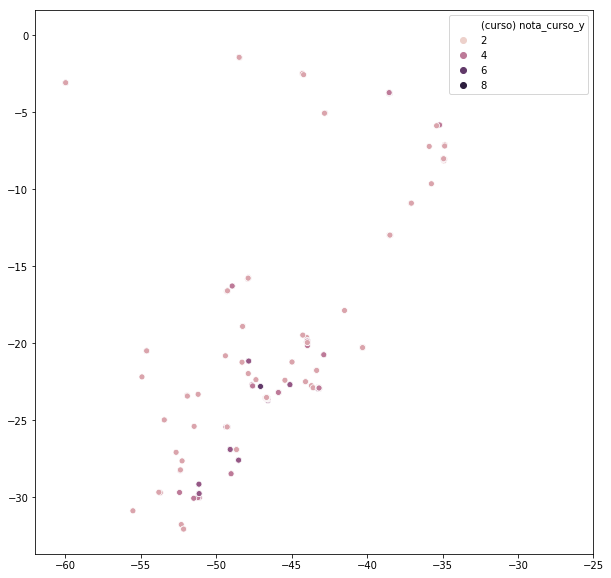

In [7]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
sns.scatterplot(X[:, 1], X[:, 0],hue=new_tab['(curso) nota_curso_y'])
ax.set_xlim([-62,-25])


In [107]:
new_tab.describe()

,(area_avaliacao) id,(area_avaliacao) codigo,(area_conhecimento) id,(area_conhecimento) codigo,(area_conhecimento) area_avaliacao_id,(programa) id,(programa) area_conhecimento_id,(programa) instituicao_id,(instituicao) id,(instituicao) codigo,(curso) id,(curso) programa_id,(curso) nota_curso_y
count,334.000000,334.000000,334.000000,3.340000e+02,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,154.014970,26.808383,11.464072,5.779821e+07,154.014970,216.422156,11.464072,162.497006,162.497006,337067.859281,298.335329,216.422156,4.047904
std,10.887208,8.587955,20.074715,1.420029e+07,10.887208,75.634761,20.074715,64.396983,64.396983,18709.284086,102.631128,75.634761,1.006337
min,149.000000,1.000000,2.000000,1.010001e+07,149.000000,87.000000,2.000000,72.000000,72.000000,2981.000000,125.000000,87.000000,2.000000
25%,149.000000,27.000000,2.000000,6.020001e+07,149.000000,151.250000,2.000000,113.250000,113.250000,338440.500000,209.250000,151.250000,3.000000
50%,149.000000,27.000000,2.000000,6.020001e+07,149.000000,213.000000,2.000000,148.000000,148.000000,338689.000000,296.500000,213.000000,4.000000
75%,152.750000,27.000000,8.750000,6.020001e+07,152.750000,280.750000,8.750000,194.500000,194.500000,339022.750000,385.750000,280.750000,5.000000
max,197.000000,50.000000,84.000000,9.050001e+07,197.000000,353.000000,84.000000,331.000000,331.000000,341077.000000,476.000000,353.000000,7.000000


Todos os dados númericos acima se tratam de identificadores, no caso '.describe()' não faria sentido.

In [73]:
import mplleaflet as mpl

In [153]:
cols = plt.get_cmap('autumn_r')

In [154]:
def leaflet_plot(z):

    long = z[:,1].tolist()
    lat = z[:,0].tolist()
    
    plt.figure(figsize=(3,7))
    
    pp = plt.scatter(long, lat,c=new_tab['(curso) nota_curso_y'],cmap=cols, s=100)
    #plt.colorbar(pp)
    
    return mpl.display()

In [155]:
leaflet_plot(X) 
#Gradiente amarelo(nota 2) até vermelho(nota 7)
#Implementação do mpleaflet parece não suportar plt.colorbar()